In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_review.json'
df_rev = pd.read_json(path, lines=True, nrows=100000)
df_rev.shape   

(100000, 9)

In [3]:
df_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
path_bus = '/content/drive/MyDrive/Colab Notebooks/yelp_academic_dataset_business.json'
df_bus = pd.read_json(path_bus, lines=True)
df_bus.shape

(150346, 14)

In [5]:
df_bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
df_rest = df_bus[df_bus['categories'].str.contains('Restaurant', na=False)]
df_rest.shape

(52286, 14)

In [7]:
df_rest.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [8]:
df_merged = df_rev.merge(df_rest, how='inner', on='business_id')
df_merged.shape

(72125, 22)

In [9]:
df_merged.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72125 entries, 0 to 72124
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_id     72125 non-null  object        
 1   user_id       72125 non-null  object        
 2   business_id   72125 non-null  object        
 3   stars_x       72125 non-null  int64         
 4   useful        72125 non-null  int64         
 5   funny         72125 non-null  int64         
 6   cool          72125 non-null  int64         
 7   text          72125 non-null  object        
 8   date          72125 non-null  datetime64[ns]
 9   name          72125 non-null  object        
 10  address       72125 non-null  object        
 11  city          72125 non-null  object        
 12  state         72125 non-null  object        
 13  postal_code   72125 non-null  object        
 14  latitude      72125 non-null  float64       
 15  longitude     72125 non-null  float6

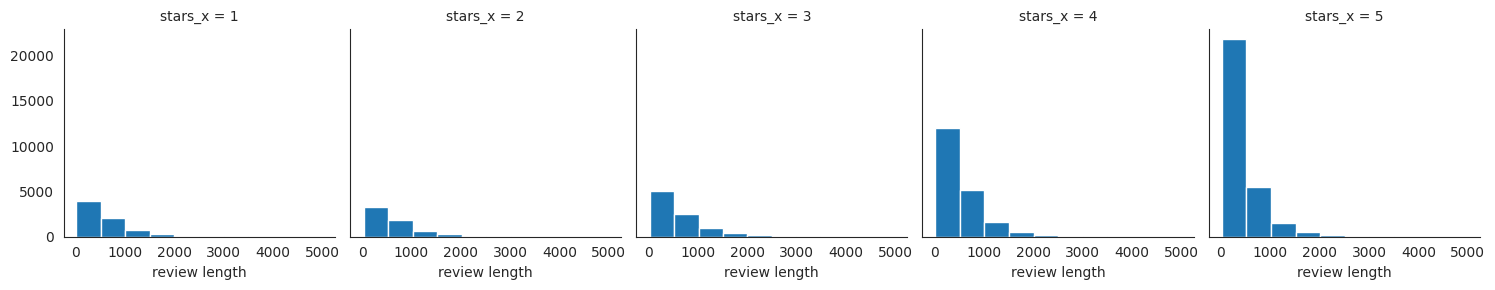

In [11]:
df_merged['review length'] = df_merged['text'].apply(len)
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(df_merged,col='stars_x')
g.map(plt.hist,'review length')

In [12]:
poorreviews = df_merged[(df_merged.stars_x <= 2 )]
neutralreviews = df_merged[(df_merged.stars_x == 3 )]
goodreviews = df_merged[(df_merged.stars_x >= 4)]
print('Poor reviews ' + str(poorreviews.shape))
print('Neutral reviews ' + str(neutralreviews.shape))
print('Good reviws ' + str(goodreviews.shape))

Poor reviews (13536, 23)
Neutral reviews (9093, 23)
Good reviws (49496, 23)


In [13]:
import collections
import re
import sys
import time
from nltk.tokenize import TweetTokenizer


def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    #return re.findall(r'\w+', string.lower())
    tweet_tokenizer = TweetTokenizer()
    res = [x.replace("'", '') for x in tweet_tokenizer.tokenize(string)]
    return res

def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')


In [14]:
most_frequent_poorreviews = count_ngrams(poorreviews.text, min_length=6, max_length=8)
print_most_frequent(most_frequent_poorreviews, num=25)

----- 25 most common 6-grams -----
really wanted to like this place: 47
I really wanted to like this: 43
nothing to write home about .: 41
. I really wanted to like: 39
I will not be back .: 32
will not be going back .: 31
. We wont be back .: 29
. Do yourself a favor and: 28
a lot to be desired .: 28
I will not be going back: 28
. I will not be back: 28
. I will not be returning: 28
I would not recommend this place: 27
. I will never go back: 27
. The food was good ,: 25
. Needless to say , we: 25
. I would not recommend this: 25
. I wont be back .: 24
this is the place for you: 24
I was really looking forward to: 24
I have ever been to .: 24
. I will not be going: 24
I will not be returning .: 22
was not good at all .: 22
a bad taste in my mouth: 21

----- 25 most common 7-grams -----
I really wanted to like this place: 37
. I really wanted to like this: 32
this is the place for you .: 20
. I will not be back .: 20
. Dont waste your time or money: 19
. I would not recommend this plac

In [15]:
most_frequent_neutralreviews = count_ngrams(neutralreviews.text, min_length=6, max_length=8)
print_most_frequent(most_frequent_neutralreviews, num=25)

----- 25 most common 6-grams -----
nothing to write home about .: 47
go out of my way to: 40
. The food was good ,: 31
wouldnt go out of my way: 29
. If you are looking for: 25
but nothing to write home about: 24
. Dont get me wrong ,: 24
. The food was pretty good: 20
I wouldnt go out of my: 20
the best part of the meal: 20
. The food is good but: 20
. The food is good ,: 19
. The food was good but: 18
. It was good , but: 17
. The food was good .: 17
best part of the meal .: 17
. On the other hand ,: 17
. All in all , I: 17
. Nothing to write home about: 17
out of my way to eat: 16
. The food was ok ,: 16
. I really wanted to like: 15
Ive been here a few times: 15
good , but not great .: 14
. The service was very good: 14

----- 25 most common 7-grams -----
I wouldnt go out of my way: 20
but nothing to write home about .: 18
wouldnt go out of my way to: 17
the best part of the meal .: 15
go out of my way to eat: 14
, but nothing to write home about: 13
. The food was good , but: 13
b

In [16]:
most_frequent_goodreviews = count_ngrams(goodreviews.text, min_length=6, max_length=8)
print_most_frequent(most_frequent_goodreviews, num=25)

----- 25 most common 6-grams -----
I cant wait to go back: 181
. I will definitely be back: 167
the best Ive ever had .: 152
. We will definitely be back: 150
. Cant wait to go back: 122
. If you are looking for: 122
. I love this place .: 112
. I cant wait to go: 103
. This is a great place: 94
had in a long time .: 93
If you are looking for a: 88
the best I have ever had: 84
This is one of my favorite: 80
. I highly recommend this place: 80
this is the place to go: 77
Ive had in a long time: 75
. I love this place !: 75
. This is one of my: 74
wait to go back and try: 73
of the best Ive ever had: 73
. We will be back .: 73
. This is one of the: 72
. Do yourself a favor and: 71
This is a great place to: 69
. The staff is friendly and: 68

----- 25 most common 7-grams -----
. I cant wait to go back: 98
. If you are looking for a: 68
Ive had in a long time .: 53
. This is a great place to: 53
. This is one of my favorite: 51
I cant wait to go back and: 51
the best I have ever had .: 50


In [20]:
df_merged.loc[df_merged['stars_x'] <= 3, 'sentiment'] = 0 
df_merged.loc[df_merged['stars_x'] > 3, 'sentiment'] = 1
df_merged.shape
df_merged.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,review length,sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",513,0.0
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",477,0.0
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",216,1.0
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,We came on a Saturday morning after waiting a ...,2017-11-19 02:20:23,Turning Point of North Wales,...,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",736,0.0
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,2,0,0,0,"Mediocre at best. The decor is very nice, and ...",2017-09-09 17:49:47,Turning Point of North Wales,...,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",953,0.0


In [38]:
df_merged.isnull().values.any()

True

In [52]:
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged.dropna(inplace=True)

In [53]:
df_merged.isnull().values.any()

False

In [54]:
df_merged.shape

(69386, 24)

In [55]:
from sklearn.model_selection import train_test_split

X = df_merged['text'] 
y = df_merged['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

X_train.head()

69630    This is their first day open, so I'm making al...
5310     Went back for the lunch buffet, and was very d...
41645    $5 drinks is wonderful, if they didn't run out...
22880    Came for a late Sunday lunch. Got a booth by t...
50520    Lloyds is simply a beautiful bar with great dr...
Name: text, dtype: object

In [56]:
X_train.shape

(48570,)

In [57]:
X_train.isnull().values.any()

False

In [58]:
y_train.shape

(48570,)

In [59]:
y_train.isnull().values.any()

False

In [60]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

def evaluate(y_test, predictions):
    cf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix for Test data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [61]:
from gensim.models import Word2Vec

train_cleaned_reviews = X_train.str.split() # tokenization
test_cleaned_reviews = X_test.str.split() # tokenization

number_of_features = 5
model_w2v = Word2Vec(
            train_cleaned_reviews,
            vector_size=number_of_features, # nmumber of features
            window=5, # window size
            min_count=5, # Ignores all words with total frequency lower than 5.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0, # negative sampling will be used
            negative = 10, # > 0, for negative sampling
            workers= 4, # number of cores
            seed = 42 
)

model_w2v.train(train_cleaned_reviews, total_examples= len(X_train), epochs=20)

(71034586, 95613340)

In [66]:
def getVectors(dataset):
  word_Embedding=np.zeros(number_of_features) 
  vectors=[]
  for review in dataset:
    wordCount=0
    # Loop over each word in the review and, if it is in the model's vocaublary, add its feature vector to the total
    for word in review: 
      if word in model_w2v.wv.vocab: # model_w2v.wv.vocab is a list that contains the names of the words in the model's vocabulary
        word_Embedding=word_Embedding+model_w2v.wv[word] 
        wordCount=wordCount+1
  
    word_Embedding=word_Embedding/wordCount  # Get the average
    vectors.append(word_Embedding)
  return vectors

In [67]:
trainReviewVectors=getVectors(train_cleaned_reviews)
testReviewVectors=getVectors(test_cleaned_reviews)

AttributeError: ignored

In [65]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(trainReviewVectors, y_train)
predictions = model_lr.predict(testReviewVectors)
evaluate(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

In [ ]:
print(classification_report(y_test, predictions, digits=4))